In [1]:
# lab 2

#An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

#Some business Objectives:

#Retain customers,
#Analyze relevant customer data,
#Develop focused customer retention programs.
#Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

#Instructions
#Import the necessary libraries.
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
#First look at its main features (head, shape, info).
#Rename the columns so they follow the PE8 (snake case).
#Change effective to date column to datetime format.
#Check NaN values per column.
#Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
#For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
#Get categorical features.
#What should we do with the customer_id column?

In [37]:
#Import the necessary libraries.

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
#First look at its main features (head, shape, info).

customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor         

In [7]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [8]:
#Rename the columns so they follow the PE8 (snake case).

customer_df.columns = [e.replace(' ', '_') for e in customer_df.columns]

In [9]:
customer_df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [10]:
#Change effective to date column to datetime format.

customer_df['Effective_To_Date'] = pd.to_datetime(customer_df['Effective_To_Date'], errors = 'coerce')

In [11]:
customer_df.dtypes

Customer                                 object
State                                    object
Customer_Lifetime_Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective_To_Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location_Code                            object
Marital_Status                           object
Monthly_Premium_Auto                      int64
Months_Since_Last_Claim                   int64
Months_Since_Policy_Inception             int64
Number_of_Open_Complaints                 int64
Number_of_Policies                        int64
Policy_Type                              object
Policy                                   object
Renew_Offer_Type                         object
Sales_Channel                           

In [12]:
#Check NaN values per column.

nulls = pd.DataFrame(customer_df.isna().sum()/len(customer_df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,Customer,0.0
1,State,0.0
22,Vehicle_Class,0.0
21,Total_Claim_Amount,0.0
20,Sales_Channel,0.0
19,Renew_Offer_Type,0.0
18,Policy,0.0
17,Policy_Type,0.0
16,Number_of_Policies,0.0
15,Number_of_Open_Complaints,0.0


In [74]:
nulls = pd.DataFrame(customer_df.isna().sum())
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Number of Null Values']
nulls.sort_values(by='Number of Null Values', ascending = False)

,column_name,Number of Null Values
0,Customer,0
1,State,0
22,Vehicle_Class,0
21,Total_Claim_Amount,0
20,Sales_Channel,0
19,Renew_Offer_Type,0
18,Policy,0
17,Policy_Type,0
16,Number_of_Policies,0
15,Number_of_Open_Complaints,0


In [13]:
# Since there are no null values we check the data

customer_df.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [14]:
# The first quartile for income variable has too many 0.00

customer_df['Income'].value_counts()

# Length: n of unique values

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: Income, Length: 5694, dtype: int64

In [15]:
# To avoid  the large amount of zeros affecting our analysis 
# we replace the zeros with the median

median_income = customer_df['Income'].median(skipna = True)
customer_df['Income'] = customer_df.Income.mask(customer_df.Income == 0, median_income)

In [16]:
customer_df['Income'].value_counts()

33889.5    2317
95697.0      12
20978.0       7
40864.0       7
61108.0       7
           ... 
18779.0       1
61085.0       1
25074.0       1
49057.0       1
18944.0       1
Name: Income, Length: 5694, dtype: int64

In [17]:
# Define a function that differentiates between continuous and discrete variables. 
# Hint: A number of unique values might be useful. 
# Store continuous data into a continuous variable and do the same for discrete and categorical.

numerical_data = customer_df.select_dtypes(np.number)
numerical_data.head()


,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,2763.519279,56274.0,69,32,5,0,1,384.811147
1,6979.535903,33889.5,94,13,42,0,8,1131.464935
2,12887.431650,48767.0,108,18,38,0,2,566.472247
3,7645.861827,33889.5,106,18,65,0,7,529.881344
4,2813.692575,43836.0,73,12,44,0,1,138.130879


In [18]:
# Divide numerical data into continuous and discrete

numerical_data.nunique()

Customer_Lifetime_Value          8041
Income                           5694
Monthly_Premium_Auto              202
Months_Since_Last_Claim            36
Months_Since_Policy_Inception     100
Number_of_Open_Complaints           6
Number_of_Policies                  9
Total_Claim_Amount               5106
dtype: int64

In [19]:
# Columns with less unique values than 10% of the full dataset are most likely discrete

discrete_data = [i for i in numerical_data if (len(numerical_data[i].unique()) < (numerical_data.shape[0] * 0.01))]


In [20]:
discrete_data

['Months_Since_Last_Claim', 'Number_of_Open_Complaints', 'Number_of_Policies']

In [21]:
continuous_data = list(numerical_data.drop(columns = discrete_data).columns)

In [22]:
continuous_data

['Customer_Lifetime_Value',
 'Income',
 'Monthly_Premium_Auto',
 'Months_Since_Policy_Inception',
 'Total_Claim_Amount']

In [23]:
categorical_data = customer_df.select_dtypes(object)

In [24]:
categorical_data.nunique()

Customer            9134
State                  5
Response               2
Coverage               3
Education              5
EmploymentStatus       5
Gender                 2
Location_Code          3
Marital_Status         3
Policy_Type            3
Policy                 9
Renew_Offer_Type       4
Sales_Channel          4
Vehicle_Class          6
Vehicle_Size           3
dtype: int64

In [25]:
# create continuous and discrete data frame

continuous_df = numerical_data.drop(columns = discrete_data)
continuous_df.head()


,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Policy_Inception,Total_Claim_Amount
0,2763.519279,56274.0,69,5,384.811147
1,6979.535903,33889.5,94,42,1131.464935
2,12887.431650,48767.0,108,38,566.472247
3,7645.861827,33889.5,106,65,529.881344
4,2813.692575,43836.0,73,44,138.130879


In [26]:
discrete_df = numerical_data[discrete_data]
discrete_df.head()

,Months_Since_Last_Claim,Number_of_Open_Complaints,Number_of_Policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [27]:
# Lab 4 feature extraction

In [28]:
# For this lab, we will be using the same dataset we used in the previous labs. 
#We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

# Instructions
# Open the categoricals variable we created before.


In [29]:
categorical_df = categorical_data
categorical_df.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [30]:
# We drop Customer ID since it is irrelevant for our analysis
categorical_df = customer_df.drop(['Customer'], axis = 1)


In [31]:
# Plot all the categorical variables with the proper plot. What can you see?
# There might be some columns that seem to be redundant, check their values to be sure. 
# What should we do with them?
# Plot time variable. Can you extract something from it?


In [ ]:
f, axes = plt.subplots(int(categorical_df.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categorical_df):

    sns.barplot(x = categorical_df[col].value_counts().index,
                y = categorical_df[col].value_counts())  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()


In [ ]:
# What can you see from the plots?
# Any skewness? = Unbalanced data
# Do we have redundant data? = categories that can be merged
# Is there any feature that we can turn into a binary variabel?

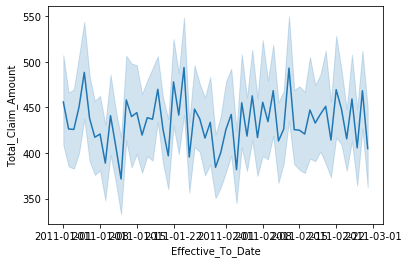

In [36]:
# Plot time variable. Can you extract something from it?

sns.lineplot(x="Effective_To_Date", y="Total_Claim_Amount", data = customer_df);